Author: [YANG Jiancheng](https://github.com/duducheng)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import pairwise_distances

np.random.seed(6)
% matplotlib inline

In [2]:
def make_clusters(skew=True, *arg,**kwargs):
    X, y = datasets.make_blobs(*arg,**kwargs)
    if skew:
        nrow = X.shape[1]
        for i in np.unique(y):
            X[y==i] = X[y==i].dot(np.random.random((nrow,nrow))-0.5)
    return X,y

def scatter(X, color=None, ax=None, centroids=None):
    assert X.shape[1]==2
    if color is not None:
        assert X.shape[0]==y.shape[0]
        assert len(y.shape)==1
    if not ax:
        _, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=color)
    if centroids is not None:
        ax.scatter(centroids[:,0],centroids[::,1], marker="o",s=350, c=range(centroids.shape[0]))

(1500, 2)
(1500,)
[0 1 2 3]


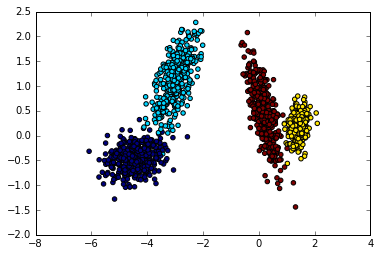

In [3]:
K = 4
X, y = make_clusters(skew=True, n_samples=1500, centers=K)
answer = y
print(X.shape)
print(y.shape)
print(np.unique(y))
scatter(X, y)

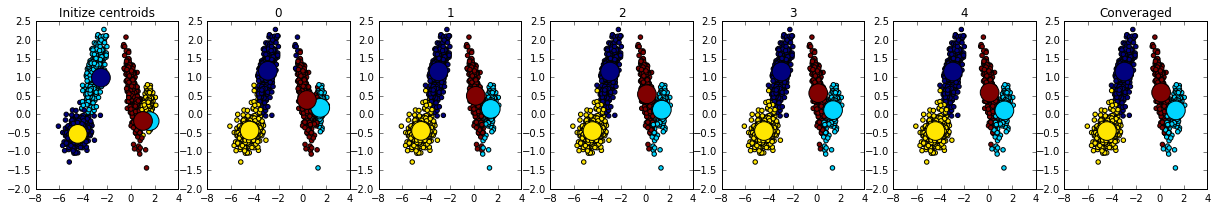

In [6]:
# KMeans cannot handle the skewed data well, KMeans++ cannot change the fact.

# assign to the clusters (M-step)
def get_assignments(X, centroids):
    dist = pairwise_distances(X, centroids)
    assign = np.argmin(dist,axis=1)
    return assign

# compute the new centroids (E-step)
def get_centroids(X, assignments):
    centroids = []
    for i in np.unique(assignments):
        centroids.append(X[assignments==i].mean(axis=0))     
    return np.array(centroids)

def init_kmeans_plus_plus(X, K):
    '''Choose the next centroids with a prior of distance.'''
    assert K>=2, "So you want to make 1 cluster?"
    compute_distance = lambda X, c: pairwise_distances(X, c).min(axis=1)
    # get the first centroid
    centroids = [X[np.random.choice(range(X.shape[0])),:]]
    # choice next
    for _ in range(K-1):
        proba = compute_distance(X,centroids)**2
        proba /= proba.sum()
        centroids.append(X[np.random.choice(range(X.shape[0]), p=proba)])      
    return np.array(centroids)

def KMeans(X, centroids, n_iterations=5, axes=None):
    if axes is not None:
        axes = axes.flatten()
    for i in range(n_iterations):
        assignments = get_assignments(X, centroids)
        centroids = get_centroids(X, assignments)
        if axes is not None:
            scatter(X, assignments, ax=axes[i], centroids=centroids)
            axes[i].set_title(i)
    return assignments, centroids

centroids = init_kmeans_plus_plus(X, K)
n_iterations = 5
_, axes = plt.subplots(1, n_iterations+2, figsize=(21,3))
scatter(X, y, ax=axes[0], centroids=centroids)
axes[0].set_title('Initize centroids')

assignments, centroids = KMeans(X, centroids, axes=axes[1:-1], n_iterations=n_iterations)
scatter(X, assignments, ax=axes[-1], centroids=centroids)
axes[-1].set_title('Converaged')